# Customer Segmentation & Recommendation System

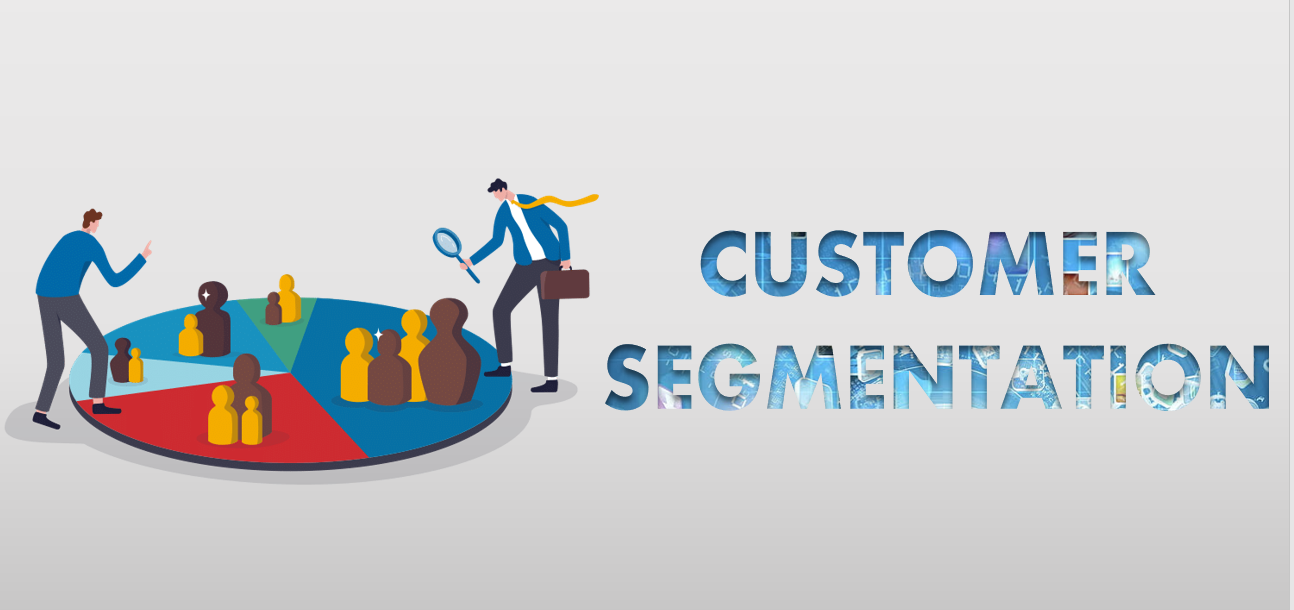

In [71]:
Image(filename='customersegment.PNG', width=800, height=200)

This project revolves around a UK-based online retailer's transactional dataset collected between 2010 and 2011.

The primary objective is to transform the raw data into a customer-centric format, enabling the amplification of marketing strategies through effective customer segmentation.


Objectives:

1.Data Cleaning & Transformation:
  handling duplicates, missing values, data format and outliers ...
2.
3.

## Setup & Initialization

Importing Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image


Loading the Dataset

In [4]:
transaction = pd.read_csv(r'C:\Users\OrdiOne\Data Analytics Pro/UKtransaction.csv',encoding="ISO-8859-1" )
transaction

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
#Summary statistics for numerical variables:
transaction.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [7]:
#Summary statistics for catergorical variables:
transaction.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


## Data Cleaning & Transformation:

Handling Missing Values

In [8]:
#Percentage of missing values:
missing_data = transaction.isnull().sum()
missing_data

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
missing_data_percentage = (missing_data[missing_data > 0]/ transaction.shape[0]) * 100
missing_data_percentage

Description     0.268311
CustomerID     24.926694
dtype: float64

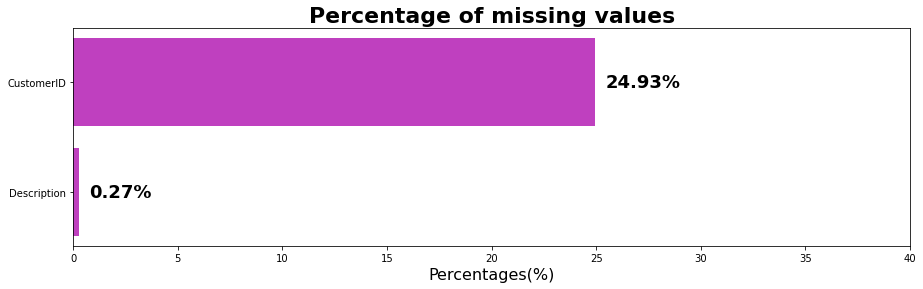

In [10]:
#Plotting
fig, ax =plt.subplots(figsize=(15, 4)) #Creates a new figure and a set of subplots

#Creates a horizontal bar
ax.barh(missing_data_percentage.index, missing_data_percentage, color='#BF40BF')

#Annotate the bars with their respective percentage valuesv
for i, (value, name) in enumerate(zip(missing_data_percentage, missing_data_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

ax.set_xlim([0, 40]) #the plot ranges from 0 to 40 on the x-axis.

plt.title("Percentage of missing values", fontweight='bold', fontsize=22 )
plt.xlabel('Percentages(%)', fontsize=16)
plt.show()

Handling Missing Values: 
Removing the missing values in the CustomerID & Description columns 
       

In [11]:
transaction[(transaction.CustomerID.isnull()) | (transaction.Description.isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [12]:
transaction = transaction.dropna(subset=['CustomerID', 'Description'])

In [13]:
transaction.isnull().sum().sum()

0

Handling Duplicates

In [14]:
#Finding duplicates 

duplicate_rows = transaction[transaction.duplicated(keep=False)]

In [15]:
sorted_duplicate_rows = duplicate_rows.sort_values(by=['InvoiceNo','StockCode','Description','Quantity'])

In [16]:
sorted_duplicate_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
440149,C574510,22360,GLASS JAR ENGLISH CONFECTIONERY,-1,11/4/2011 13:25,2.95,15110.0,United Kingdom
461407,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,11/13/2011 11:38,0.55,17838.0,United Kingdom
461408,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,11/13/2011 11:38,0.55,17838.0,United Kingdom
529980,C580764,22667,RECIPE BOX RETROSPOT,-12,12/6/2011 10:38,2.95,14562.0,United Kingdom


In [17]:
transaction.duplicated().sum()

5225

In [18]:
transaction.drop_duplicates(inplace=True)

C:\Users\OrdiOne\AppData\Local\Temp\ipykernel_15816\448393151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction.drop_duplicates(inplace=True)


In [19]:
transaction.duplicated().sum()

0

Cancelled Transactions('C'InvoiceNo)

In [20]:
transaction['Invoice_status'] = np.where(transaction['InvoiceNo'].astype(str).str.startswith('C'),'Cancelled', 'Completed')

C:\Users\OrdiOne\AppData\Local\Temp\ipykernel_15816\189256251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction['Invoice_status'] = np.where(transaction['InvoiceNo'].astype(str).str.startswith('C'),'Cancelled', 'Completed')


In [21]:
canceled_invoice = transaction[transaction['Invoice_status'] == 'Cancelled']

In [22]:
canceled_invoice.describe().drop('CustomerID', axis=1)

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


In [23]:
canceled_invoice_percentage = (canceled_invoice.shape[0]/transaction.shape[0]) * 100
canceled_invoice_percentage

2.209141343213713

In [24]:
print(f"Canceled Transactions Percentage:{canceled_invoice_percentage:.2f}%")

Canceled Transactions Percentage:2.21%


Correcting Stock

In [25]:
#Unique stock code
stock_code_uniq = transaction['StockCode'].nunique()
stock_code_uniq

3684

In [26]:
#top5 frequent stock codes

transaction['StockCode'].value_counts().head(5)

85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
Name: StockCode, dtype: int64

In [27]:
top_5_stock_codes = transaction['StockCode'].value_counts(normalize=True).head(5)*100
top_5_stock_codes

85123A    0.514188
22423     0.471609
85099B    0.413093
47566     0.350843
84879     0.349847
Name: StockCode, dtype: float64

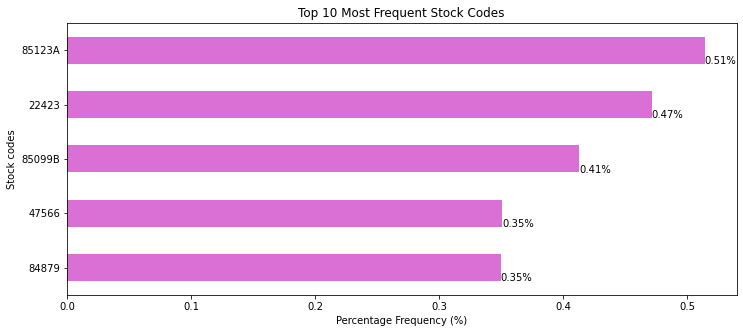

In [28]:
plt.figure(figsize=(12,5))
top_5_stock_codes.plot(kind='barh', color='#DA70D6')

for index, value in enumerate(top_5_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)
    
plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock codes')
plt.gca().invert_yaxis()
plt.show()           


In [29]:
stock_code_uniq = transaction.StockCode.unique()

In [30]:
char_count_unq_code = pd.Series(stock_code_uniq).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

In [31]:
char_count_unq_code

5    3676
0       7
1       1
dtype: int64

In [32]:
stock_code_anomalous = [ code for code in stock_code_uniq if sum(c.isdigit() for c in str(code)) in (0, 1)]

In [33]:
for code in stock_code_anomalous:
     print(code)

POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [34]:
percentage_stock_code_anomalous = (transaction['StockCode'].isin(stock_code_anomalous).sum() / len(transaction))* 100
print(f"The % of records with anomalous stockcode : {percentage_stock_code_anomalous:.2f}%")

The % of records with anomalous stockcode : 0.48%


In [35]:
transaction = transaction[~transaction['StockCode'].isin(stock_code_anomalous)]

In [36]:
transaction.shape[0]

399689

Cleaning Description:

In [37]:
description_count = transaction['Description'].value_counts()

In [38]:
top_20_description = description_count[:20]

In [39]:
top_20_description

WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
SPOTTY BUNTING                        1026
PAPER CHAIN KIT 50'S CHRISTMAS        1013
LUNCH BAG SPACEBOY DESIGN             1006
LUNCH BAG CARS BLUE                   1000
HEART OF WICKER SMALL                  990
NATURAL SLATE HEART CHALKBOARD         989
JAM MAKING SET WITH JARS               966
LUNCH BAG PINK POLKADOT                961
LUNCH BAG SUKI DESIGN                  932
ALARM CLOCK BAKELIKE RED               917
REX CASH+CARRY JUMBO SHOPPER           900
Name: Description, dtype: int64

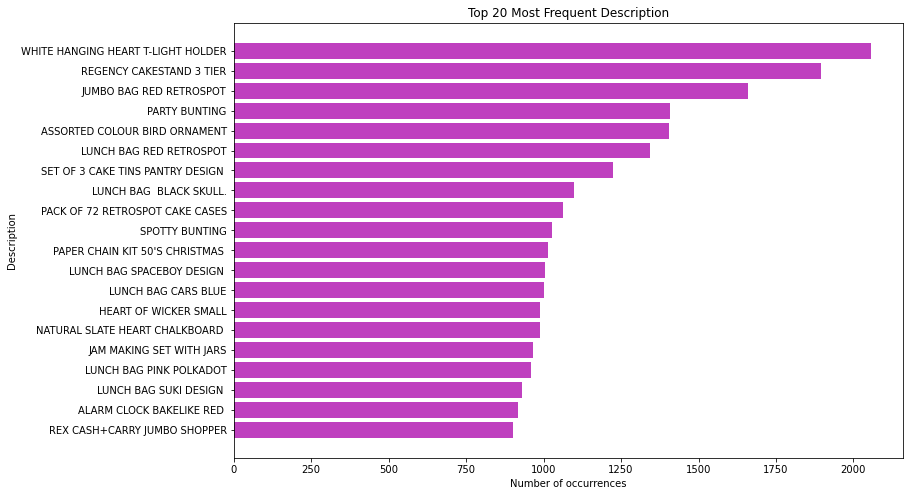

In [40]:
#plotting
plt.figure(figsize=(12,8))
plt.barh(top_20_description.index[::-1], top_20_description.values[::-1], color='#BF40BF')

plt.xlabel('Number of occurrences')
plt.ylabel('Description')
plt.title('Top 20 Most Frequent Description')
plt.show()

In [43]:
Description_lowercase = transaction['Description'].unique()
Description_lowercase = [desc for desc in Description_lowercase if any(char.islower() for char in desc)]

In [46]:
for desc in Description_lowercase:
    print(desc)

BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


In [58]:
Not_a_product = ['Next Day Carriage','High Resolution Image']

In [59]:
transaction = transaction[~transaction['Description'].isin(Not_a_product)]

In [60]:
transaction['Description'] = transaction['Description'].str.upper()

In [66]:
transaction.shape[0]

399606

Zero Unit Prices

In [67]:
transaction[transaction['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,33.000000
mean,420.515152
std,2176.713608
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000


In [70]:
transaction = transaction[transaction['UnitPrice']>0]

In [69]:
transaction

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


## Feature Engineering:

RFM Features

Recency:

In [73]:
transaction['InvoiceDate']= pd.to_datetime(transaction['InvoiceDate'])

In [77]:
transaction['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 399573, dtype: datetime64[ns]

In [78]:
transaction['InvoiceDate']= transaction['InvoiceDate'].dt.date

In [79]:
transaction['InvoiceDate']

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: InvoiceDate, Length: 399573, dtype: object

In [82]:
customer = transaction.groupby('CustomerID')['InvoiceDate'].max().reset_index()

In [84]:
customer

,CustomerID,InvoiceDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4357,18280.0,2011-03-07
4358,18281.0,2011-06-12
4359,18282.0,2011-12-02
4360,18283.0,2011-12-06


In [91]:
recentDate = transaction['InvoiceDate'].max()
recentDate = pd.to_datetime(recentDate)
recentDate

Timestamp('2011-12-09 00:00:00')

In [89]:
customer['InvoiceDate']= pd.to_datetime(customer['InvoiceDate'])

In [90]:
customer

,CustomerID,InvoiceDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4357,18280.0,2011-03-07
4358,18281.0,2011-06-12
4359,18282.0,2011-12-02
4360,18283.0,2011-12-06


In [93]:
customer['days_since_last_purchase'] = (recentDate - customer['InvoiceDate']).dt.days
customer

,CustomerID,InvoiceDate,days_since_last_purchase
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
...,...,...,...
4357,18280.0,2011-03-07,277
4358,18281.0,2011-06-12,180
4359,18282.0,2011-12-02,7
4360,18283.0,2011-12-06,3


In [94]:
customer.drop(columns=['InvoiceDate'], inplace=True)

In [95]:
customer

,CustomerID,days_since_last_purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310
...,...,...
4357,18280.0,277
4358,18281.0,180
4359,18282.0,7
4360,18283.0,3


Frequency

Total Transactions

In [96]:
transaction.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,Completed


In [102]:
transaction['CustomerID'] = transaction['CustomerID'].astype(int)

In [124]:
Total_Transaction = transaction.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
Total_Transaction

,CustomerID,InvoiceNo
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1
...,...,...
4357,18280,1
4358,18281,1
4359,18282,3
4360,18283,16


In [125]:
Total_purchased_prod = transaction.groupby('CustomerID')['Quantity'].sum().reset_index()
Total_purchased_prod

,CustomerID,Quantity
0,12346,0
1,12347,2458
2,12348,2332
3,12349,630
4,12350,196
...,...,...
4357,18280,45
4358,18281,54
4359,18282,98
4360,18283,1355


In [126]:
Total_Transaction.rename(columns={'InvoiceNo':'Total_Transaction'}, inplace=True)

In [127]:
Total_purchased_prod.rename(columns={'Quantity':'Total_purchased_prod'}, inplace=True)

In [128]:
#Merge the new features to the dataframe "customer"

customer = pd.merge(customer, Total_Transaction, on='CustomerID')
customer = pd.merge(customer, Total_purchased_prod, on='CustomerID')

In [129]:
customer

,CustomerID,days_since_last_purchase,Total_Transaction,Total_purchased_prod
0,12346.0,325,2,0
1,12347.0,2,7,2458
2,12348.0,75,4,2332
3,12349.0,18,1,630
4,12350.0,310,1,196
...,...,...,...,...
4357,18280.0,277,1,45
4358,18281.0,180,1,54
4359,18282.0,7,3,98
4360,18283.0,3,16,1355


Monetary

In [130]:
transaction.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,Completed


In [135]:
Amount_Spent

,CustomerID,Amount_Spent
0,12346,0.00
1,12347,4310.00
2,12348,1437.24
3,12349,1457.55
4,12350,294.40
...,...,...
4357,18280,180.60
4358,18281,80.82
4359,18282,176.60
4360,18283,2039.58


In [136]:
customer = pd.merge(customer, Amount_Spent, on='CustomerID')

In [137]:
customer

,CustomerID,days_since_last_purchase,Total_Transaction,Total_purchased_prod,Amount_Spent
0,12346.0,325,2,0,0.00
1,12347.0,2,7,2458,4310.00
2,12348.0,75,4,2332,1437.24
3,12349.0,18,1,630,1457.55
4,12350.0,310,1,196,294.40
...,...,...,...,...,...
4357,18280.0,277,1,45,180.60
4358,18281.0,180,1,54,80.82
4359,18282.0,7,3,98,176.60
4360,18283.0,3,16,1355,2039.58


In [139]:
Average_Transaction = Amount_Spent.merge(Total_Transaction, on='CustomerID')

In [141]:
Average_Transaction['Average_Transaction']= Average_Transaction['Amount_Spent'] / Average_Transaction['Total_Transaction']

In [142]:
Average_Transaction

,CustomerID,Amount_Spent,Total_Transaction,Average_Transaction
0,12346,0.00,2,0.000000
1,12347,4310.00,7,615.714286
2,12348,1437.24,4,359.310000
3,12349,1457.55,1,1457.550000
4,12350,294.40,1,294.400000
...,...,...,...,...
4357,18280,180.60,1,180.600000
4358,18281,80.82,1,80.820000
4359,18282,176.60,3,58.866667
4360,18283,2039.58,16,127.473750


In [143]:
customer

,CustomerID,days_since_last_purchase,Total_Transaction,Total_purchased_prod,Amount_Spent
0,12346.0,325,2,0,0.00
1,12347.0,2,7,2458,4310.00
2,12348.0,75,4,2332,1437.24
3,12349.0,18,1,630,1457.55
4,12350.0,310,1,196,294.40
...,...,...,...,...,...
4357,18280.0,277,1,45,180.60
4358,18281.0,180,1,54,80.82
4359,18282.0,7,3,98,176.60
4360,18283.0,3,16,1355,2039.58


In [144]:
transaction['Amount_Spent'] = transaction['UnitPrice'] * transaction['Quantity']

In [145]:
Amount_Spent = transaction.groupby('CustomerID')['Amount_Spent'].sum().reset_index()

In [146]:
customer

,CustomerID,days_since_last_purchase,Total_Transaction,Total_purchased_prod,Amount_Spent
0,12346.0,325,2,0,0.00
1,12347.0,2,7,2458,4310.00
2,12348.0,75,4,2332,1437.24
3,12349.0,18,1,630,1457.55
4,12350.0,310,1,196,294.40
...,...,...,...,...,...
4357,18280.0,277,1,45,180.60
4358,18281.0,180,1,54,80.82
4359,18282.0,7,3,98,176.60
4360,18283.0,3,16,1355,2039.58


In [147]:
Average_Transaction

,CustomerID,Amount_Spent,Total_Transaction,Average_Transaction
0,12346,0.00,2,0.000000
1,12347,4310.00,7,615.714286
2,12348,1437.24,4,359.310000
3,12349,1457.55,1,1457.550000
4,12350,294.40,1,294.400000
...,...,...,...,...
4357,18280,180.60,1,180.600000
4358,18281,80.82,1,80.820000
4359,18282,176.60,3,58.866667
4360,18283,2039.58,16,127.473750


In [150]:
customer = pd.merge(customer, Average_Transaction[['CustomerID','Average_Transaction']], on='CustomerID')

In [151]:
customer

,CustomerID,days_since_last_purchase,Total_Transaction,Total_purchased_prod,Amount_Spent,Average_Transaction
0,12346.0,325,2,0,0.00,0.000000
1,12347.0,2,7,2458,4310.00,615.714286
2,12348.0,75,4,2332,1437.24,359.310000
3,12349.0,18,1,630,1457.55,1457.550000
4,12350.0,310,1,196,294.40,294.400000
...,...,...,...,...,...,...
4357,18280.0,277,1,45,180.60,180.600000
4358,18281.0,180,1,54,80.82,80.820000
4359,18282.0,7,3,98,176.60,58.866667
4360,18283.0,3,16,1355,2039.58,127.473750
